# Проект по увеличению выручки интернет-магазина

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

В ходе исследования мы приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

## Часть. Приоритизация гипотез 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [3]:
# Загружаем данные
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 150
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Hypothesis — краткое описание гипотезы; 

Reach — охват пользователей по 10-балльной шкале; 

Impact — влияние на пользователей по 10-балльной шкале; 

Confidence — уверенность в гипотезе по 10-балльной шкале; 

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [ ]:
#Приведем названия столбцов у нижнему регистру
data.columns = data.columns.str.lower()
data.columns

In [ ]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
data['ICE'] = np.round((data['impact'] * data['confidence'])/data['efforts'], decimals = 2)

data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

По методу ICE лидируют гипотезы 8, 0, 7

In [5]:
#Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
data['RICE'] = (data['reach']*data['impact'] * data['confidence'])/data['efforts']

data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По методу RICE лидируют гипотезы 7, 2, 0. Причем гипотеза 7 занимает первое место с очень большим отрывом. Ее мы и будем дальше исследовать: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

При этом, например, гипотеза 8 опустилась аж на 5 место, а гипотеза 2 поднялась в рейтинге с пятого на второе.
Разница в методах приоритизации ICE и RICE в параметре Reach - охвате пользователей, которых затронет изменение. Чем больше пользователей затронет изменение, тем важнее гипотеза, - и это учитывает метод RICE.

С этой точки зрения гипотеза о добавлении блоков рекомендаций на сайт (2) охватит больше пользователей, чем акция, дающая скидки на товар в день рождения (8).

## Часть. Анализ A/B-теста
Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

### Orders. Предобработка данных

In [6]:
# Загружаем данные по заказам
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


transaction_id — идентификатор заказа; 

visitor_id — идентификатор пользователя, совершившего заказ; 

date — дата, когда был совершён заказ; 

revenue — выручка заказа; 

group — группа A/B-теста, в которую попал заказ.

In [7]:
#Переименуем некоторые столбцы
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [8]:
#Проверим данные на явные дубликаты
orders.duplicated().sum()

0

In [9]:
#Проверим данные на пропуски
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
#Приведем данные столбца date к формату strptime
import datetime as dt
orders['date'] = pd.to_datetime(orders['date'])

In [11]:
# посчитаем уникальных пользователей на сырых данных
uniq_visitor_before = len(orders['visitor_id'].unique())
uniq_visitor_before

1031

### Visitors. Предобработка данных

In [12]:
# Загружаем данные о пользователях
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [13]:
#Проверим данные на явные дубликаты
visitors.duplicated().sum()

0

In [14]:
#Проверим данные на пропуски
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
#Приведем данные столбца date к формату datetime
visitors['date'] = pd.to_datetime(visitors['date'])

### Подготовка к А/В-тесту


**Проверим как делится трафик на группы.** Чтобы это посмотреть, надо проанализировать табл visitors - посмотреть сколько визитов на сайт пользователей групп А и В было сделано за весь период теста

In [16]:
visitors.groupby('group').agg({'visitors':'sum'})

,visitors
group,
A,18736
B,18916


In [17]:
# В группе В больше посетителей, посчитаем насколько: 
100-18736*100/18916

0.9515753859166836

Разница в группах меньше 1% - это допустимо.

**Действительно ли, попавший в одну из групп посетитель, остаётся в этой группе до конца теста**

In [18]:
len(orders['visitor_id'].unique())

1031

In [19]:
orders.groupby('group').agg({'visitor_id': 'nunique'}).sum()

visitor_id    1089
dtype: int64

Значит есть 58 id, которые сидят в обоих группах!!!!

In [20]:
# Найдем их
ordersA=orders.query('group=="A"')
ordersB=orders.query('group=="B"')
ordersAB=ordersA.merge(ordersB, on='visitor_id')['visitor_id'].unique()
ordersAB

array([4069496402,  199603092, 3803269165, 2378935119,  237748145,
       4256040402, 2038680547, 1738359350, 2458001652, 3891541246,
       2716752286, 3656415546, 2686716486, 2954449915, 2927087541,
       3234906277,  457167155, 2579882178, 3957174400, 1648269707,
       2780786433,  818047933, 2044997962, 1959144690, 3202540741,
       1333886533,  351125977, 3951559397,  393266494, 3984495233,
       4120364173, 4266935830, 1230306981, 1294878855, 1614305549,
          8300375,  477780734, 1668030113, 3717692402, 3766097110,
       3941795274,  471551937, 1316129916, 1801183820, 1602967004,
       2587333274, 2600415354,  232979603, 3972127743, 1404934699,
        276558944, 3062433592, 2654030115, 3963646447, 4186807279,
       2712142231, 2949041841,  963407295])

58 уникальных клиентов, которые одновременно участвуют в обеих группах, это 5,6% от общей выборки. И я предлагаю удалить их из анализа

In [21]:
orders = orders.query('visitor_id not in @ordersAB')

Еще раз проверим, что теперь каждый пользователь относится только к одной группе

In [53]:
orders.groupby('group').agg({'visitor_id': 'nunique'}).sum()

visitor_id    973
dtype: int64

In [23]:
len(orders['visitor_id'].unique())

973

### Анализируем А/В-тест

В данном А/В тесте у нас 2 группы, А и В собственно. Дата начала теста 1 августа 2019, дата окончания теста 31 августа 2019. В группе А - 445 пользователей, в группе В - 528 пользователей.    Группы не слишком сбалансированны, относительная разница в пользу группы В 16%.

In [24]:
min(visitors['date'])

Timestamp('2019-08-01 00:00:00')

In [25]:
max(visitors['date'])

Timestamp('2019-08-31 00:00:00')

In [26]:
orders.groupby('group').agg({'visitor_id': 'nunique'})

,visitor_id
group,
A,445
B,528


In [27]:
np.round((100-445*100/528), decimals=2)

15.72

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = \
datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = \
datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [29]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [30]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

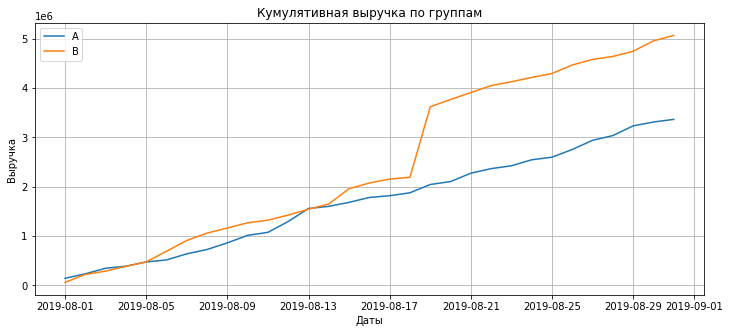

In [31]:
plt.figure(figsize=(12, 5))
plt.grid(axis = 'both')

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Даты')
plt.ylabel('Выручка')
plt.show()

Группа В значительно лучше по накопленной выручке, чем А. Выручка увеличивается, как и должно быть. Однако график выручки группы В имеет прям очень резкий скачок. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Вернемся к этому чуть позже.

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

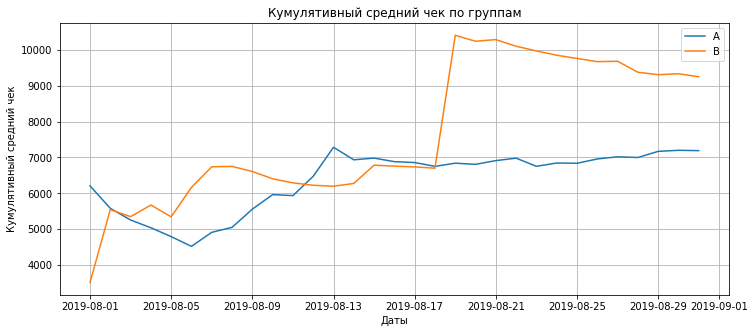

In [32]:
plt.figure(figsize=(12, 5))
plt.grid(axis = 'both')

# Разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивный средний чек')
plt.show()

После резкого роста средний чек в группе В колеблется около 9000-10000 руб.

В группе А после резкого падения, наблюдается подъем до 7 000 руб и далее небольшие колебания вокруг этой цифры.

В целом показатели группы В лучше группы А. К концу теста поле резкого скачка группа В лидирует по среднему чеку, но имеет тенденцию к снижению.

Предполагаю, что нужно отсеять крупные заказы, и тогда кривые выравняются.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

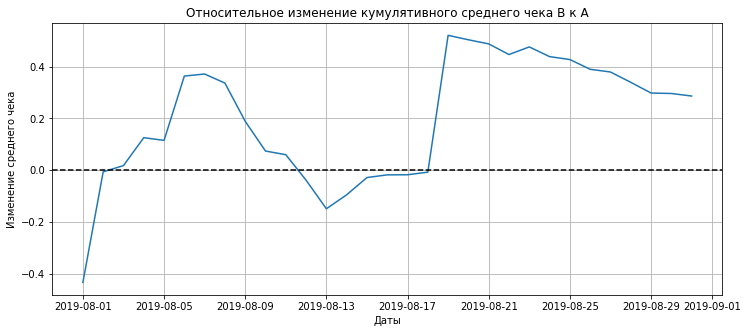

In [33]:
plt.figure(figsize=(12, 5))
plt.grid(axis = 'both')

# собираем данные в одном датафрейме
mergedCumulativeRevenue = \
cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], \
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего чека В к А')
plt.xlabel('Даты')
plt.ylabel('Изменение среднего чека')
plt.show()

Показатели группы В лучше, большая часть графика выше нулевой линии. Резкие скачки графика намекают нам о крупных заказах и выбросах...

#### Построим график кумулятивного среднего количества заказов на посетителя по группам.

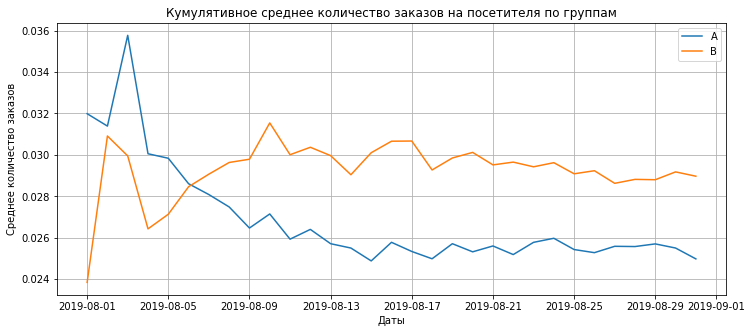

In [34]:
plt.figure(figsize=(12, 5))
plt.grid(axis = 'both')

# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Даты')
plt.ylabel('Среднее количество заказов')
plt.show()

Вначале в обеих группах наблюдались резкие скачки, но затем конверсия группы В вырвалась вперёд и более менее зафиксировалась, а конверсия группы А просела и также зафиксировалась.

#### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

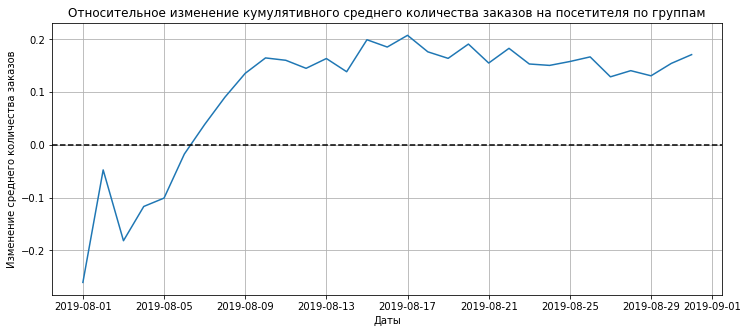

In [35]:
plt.figure(figsize=(12, 5))
plt.grid(axis = 'both')

# собираем данные в одном датафрейме
mergedCumulativeRevenue = \
cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних заказов
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Даты')
plt.ylabel('Изменение среднего количества заказов')
plt.show()

В первой половине теста наблюдается резкий скачок. Возможны выбросы по количеству заказов. А так в целом заказов в группе В больше, чем в А.

#### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

#### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Проверим выбросы по количеству заказов на одного уникального пользователя.

In [36]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'count'})
)

ordersByUsers.columns = ['visitor_id', 'count_transactions']

ordersByUsers.sort_values(by='count_transactions', ascending=False).head(10)

,visitor_id,count_transactions
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


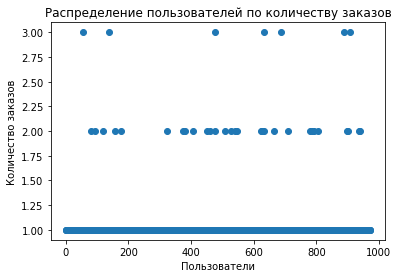

In [37]:
x_values = pd.Series(range(0,len(ordersByUsers['visitor_id'])))
plt.scatter(x_values, ordersByUsers['count_transactions']) 
plt.title('Распределение пользователей по количеству заказов')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Да, есть пользователи, которые совершали 2 и 3 заказа. Насколько это нормально? Посчитаем выборочные перцентили количества заказов на одного пользователя.

In [38]:
np.percentile(ordersByUsers['count_transactions'], [95, 99])

array([1., 2.])

Очевидно, что необходимо отсеять пользователей с тремя заказами.

In [39]:
ordersByUsers_anomal = ordersByUsers.query('count_transactions == 3')
ordersByUsers_anomal

,visitor_id,count_transactions
55,249864742,3
138,611059232,3
478,2108163459,3
632,2742574263,3
687,2988190573,3
890,3908431265,3
908,3967698036,3


In [40]:
# удалим аномальных пользователей с тремя заказами из orders
variable = ordersByUsers_anomal['visitor_id'].tolist()
orders_normal = orders.query('visitor_id not in @variable')

In [41]:
# Проверим себя, было 973, должно стать 966
len(orders_normal['visitor_id'].unique())

966

#### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

#### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [42]:
orders.sort_values(by='revenue', ascending=False) 

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
743,3603576309,4133034833,2019-08-09,67990,A
...,...,...,...,...,...
404,2052514069,1995481842,2019-08-28,70,B
933,3760662696,3577713868,2019-08-27,60,B
584,1126146019,2705308997,2019-08-20,50,A
756,125335873,3423937755,2019-08-30,50,B


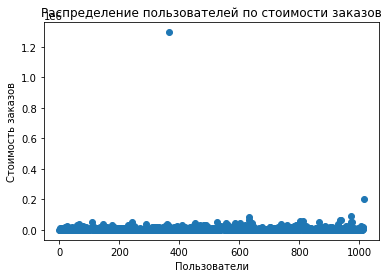

In [43]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Распределение пользователей по стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

Заказы на суммы 1,2 млн и 202 тыс - явные выбросы. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями. Найдем перцентили.

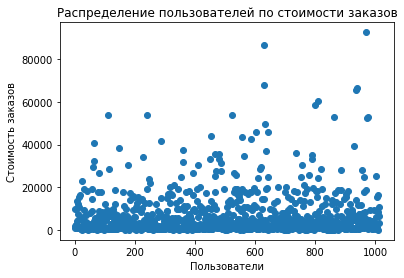

In [44]:
x_values = pd.Series(range(0,len(orders[orders['revenue'] < 202000])))
plt.scatter(x_values, orders[orders['revenue'] < 202000]['revenue']) 
plt.title('Распределение пользователей по стоимости заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.show()

In [45]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Удалим данные с заказами на сумму свыше 26 785 рублей (95 перцентилей).

In [46]:
x = np.percentile(orders['revenue'], 95)
orders_normal = orders.query('revenue < @ x')

In [48]:
# абсолютные потери, количество аномальных пользователей
lost = uniq_visitor_before - len(orders_normal['visitor_id'].unique())
print('абсолютные потери:', lost)

# относительные потери кол-во аномальных пользователей/общее количество уникальных пользователей из orders
relative_lost = lost/uniq_visitor_before
print('относительные потери:', np.round(relative_lost, decimals=2))

абсолютные потери: 108
относительные потери: 0.1


#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным. Сделайте выводы и предположения.

В случае, когда в данных есть большие (по сравнению с нормальным распределением) выбросы, параметрические тесты работают плохо. Поэтому в данном случае для А/В тестирования применим метод Манна-Уитни.

Сформулируем гипотезы. 

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем между группами есть.

In [49]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительная разница между сравниваемыми величинами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
относительная разница между сравниваемыми величинами: 0.160


 p-value = 0.01102 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный проигрыш группы А равен 16% — второе число в выводе.

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Нулевая: различий в среднем чеке заказа между группами нет.

Альтернативная: различия в среднем чеке между группами есть.

In [50]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительная разница между сравниваемыми величинами:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
относительная разница между сравниваемыми величинами: 0.287


 p-value = 0.829 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. Относительный проигрыш группы А равен 28,7% — второе число в выводе.
 
 Очень странный результат. С одной стороны - разницы между группами нет, а с другой стороны относительная разница 28,7%.
 
 Почему так? - потому что на сырых данных, не очищенных от выбросов и аномалий, тест может вести себя некорректно.

#### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем между группами есть.

In [51]:
ordersADaily = (
    orders_normal[orders_normal['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders_normal[orders_normal['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersByUsersA = (
    orders_normal[orders_normal['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders_normal[orders_normal['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value:', "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительная разница между сравниваемыми величинами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01873
относительная разница между сравниваемыми величинами: 0.153


 p-value = 0.01873 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Относительный проигрыш группы А равен 15,3% — второе число в выводе.
 
 p-value и относительный результат немного изменились, но не критично. Выводы те же что и по сырым данным. Разница между группами А и В в среднем количестве заказов есть!

#### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Нулевая: различий в среднем чеке заказа между группами нет.

Альтернативная: различия в среднем чеке между группами есть.

In [52]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders_normal[orders_normal['group']=='A']['revenue'], \
                                          orders_normal[orders_normal['group']=='B']['revenue'])[1]))
print('относительная разница между сравниваемыми величинами:', '{0:.3f}'.format(orders_normal[orders_normal['group']=='B']['revenue']\
                       .mean()/orders_normal[orders_normal['group']=='A']['revenue'].mean()-1))

p-value: 0.699
относительная разница между сравниваемыми величинами: -0.059


 p-value = 0.699 больше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, не отвергаем. Относительный проигрыш группы В равен 5.9% — второе число в выводе.
 
Теперь результаты по очищенным данным корректны. Относительная разница между группами всего 5,9% в пользу группы А.

#### Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.

3. Продолжить тест.

- Есть статистически значимое различие по среднему количеству заказов на пользователя между группами как по сырым данным, так и после фильтрации аномалий.

- График различия по среднему количеству заказов между группами сообщает, что результаты группы B лучше группы A, и имеют тенденцию к росту.

- График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.

- По сырым данным и по данным после удаления аномалий есть статистически значимое различие по среднему количеству заказов между граппами.

- По сырым данным и по данным после удаления аномалий статистически значимого различия по среднему чеку между группами нет.

**Вывод:** Можно зафиксировать лучшие результаты в группе В относительно группы А по среднему количеству заказов, и при этом отсутствие различий по среднему чеку. Тест остановить и перейти к проверке других гипотез.

## Общий вывод

Напомним, что **цель нашего исследования** — приоритизировать гипотезы для увеличения выручки интернет-магазина, запутить А/В тест и проанализировать его результаты.

По методу RICE, используемому для приоритизации гипотез, с большим отрывом лидирует гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".


Для проведения анализа мы подготовили данные: проверили на пропуски, привели к необходимому формату.

В рамках подготовки к А/В тестированию проверили правильность деления на группы.

В ходе А/В теста мы изучили графики кумулятивной выручки по группам, графики кумулятивного среднего чека по граппам и среднего количества заказов на посетителя.

- Группа В значительно лучше по накопленной выручке, чем А. 

- По среднему чеку в целом показатели группы В лучше группы А. Однако к концу теста поле резкого скачка группа В хоть и лидирует по среднему чеку, но имеет тенденцию к снижению. Это своевременно навело нас на мысль о наличии аномально крупных заказов, которые в дальнейшем для корректного анализа мы отсеяли.

- По среднему количеству заказов группа В лидирует, однако в данных также обнаружены пользователи с аномально большим количеством заказов, которые влияют на результаты анализа и корректность выводов.

Далее была проведена проверка на статистическую значимость результатов по методу Манна-Уитни, которая показала, что:
- Есть статистически значимое различие по среднему количеству заказов на пользователя между группами как по сырым данным, так и после фильтрации аномалий.
- График различия по среднему количеству заказов между группами показал, что результаты группы B лучше группы A, и имеют тенденцию к росту.
- График различия среднего чека колеблется: он-то и позволил нам найти аномалии. Сделать из этого графика определённые выводы нельзя.
- По сырым данным и по данным после удаления аномалий есть статистически значимое различие по среднему количеству заказов между граппами.
- По сырым данным и по данным после удаления аномалий статистически значимого различия по среднему чеку между группами нет.

**Вывод: Можно зафиксировать лучшие результаты в группе В относительно группы А по среднему количеству заказов, и при этом отсутствие различий по среднему чеку. Тест остановить и перейти к проверке других гипотез.**

